<a href="https://colab.research.google.com/github/AnthoMant/Etude-de-march-sur-le-vin/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-------------------------

-----------------------------------

-----------------------------------------------

**LIEN VERS LE DASHBOARD : https://community.powerbi.com/t5/Data-Stories-Gallery/Etude-de-march%C3%A9-Le-Domaine-de-la-Croix/m-p/1975661#M5543**

----------------------------

------------------------------------------

---------------------------------------------------

# Etude de marché sur le vin

Le client, le Domaine des Croix, cherche à définir le prix de ses bouteilles de vin pour le marché américain. Il a récupéré un jeu de données de 130k bouteilles de vin, avec les cépages, les pays et région de production, les millésimes (c'est-à-dire les années de production), ainsi que des notes ("points") et descriptifs d'oenologues (les spécialistes du vin), et le prix de toutes ces bouteilles sur le marché américain.

**L'objectif sera de faire une présentation de 5 minutes de l'analyse du marché, et du prix que tu conseilles de fixer pour les vins du client.** Le client n'est pas data analyst, mais souhaiterait comprendre la démarche. Il faudra donc s'attacher à expliquer comment les prix ont été fixés, sans rentrer dans un trop grand niveau technique, autrement dit : vulgariser.

Tu trouveras ci-dessous des trames pour te guider dans cette analyse. Effectue tout d'abord la trame commune. Puis, tu peux suivre l'une de ces trames (Machine Learning ou Business Intelligence). **Ne cherche pas à effectuer les deux trames ! Choisir, c'est renoncer. Le client préfère un travail qualitatif plutôt qu'un travail exhaustif.**
Mais tu peux aussi partir dans d'autres directions pour répondre à la problématique du client. Si tu as des bonnes idées à proposer au client, elles sont évidemment les bienvenues. C'est toi le Data Analyst maintenant. 




# Jeux de données
- Dataset des 130k vins : https://github.com/murpi/wilddata/raw/master/wine.zip
- Dataset des 14 vins du Domaine des Croix : https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv


#Importation des librairie

In [ ]:
#Préprocessing
import pandas as pd
import numpy as np

#Graphique
import matplotlib.pyplot as plt
import seaborn as sns

#Prediction
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
pd.set_option('max_colwidth', 300)

# Trame commune : préparation des données et analyse exploratoire





## Preprocessing
La colonne "title" contient le domaine, le millésime et le cépage ("variety"). Tu dois isoler le millésime (l'année) dans une colonne dédiée.


## Analyse du marché
Le Domaine des Croix souhaiterait une analyse descriptive du marché du vin. Tu vas donc réaliser un ensemble de dataviz, avec l'outil de ton choix (Seaborn, Plotly, Excel, PowerBI, Tableau, etc...). Par exemple : 
- la répartition du nombre de vins par pays
- les pays qui ont les meilleures notes
- les moyennes de notes par cépage
- la répartition par décile
- etc...

Le client souhaiterait un zoom spécifique sur le cépage ("variety") Pinot Noir.


## Descriptions
Quels sont les mots qui ressortent le plus dans les descriptions des vins ? Et spécifiquement pour le pinot noir, est-ce très différent ?  Et pour la province Burgundi en France ?



###Importation des datasets

In [ ]:
df_vin_us = pd.read_csv("https://github.com/murpi/wilddata/raw/master/wine.zip")
df_vin = pd.read_csv("https://github.com/murpi/wilddata/raw/master/domaine_des_croix.csv")

In [ ]:
df_vin_us

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2017 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2017 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2021.",Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2019.",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [ ]:
df_vin

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,"Firm and solid with great swathes of black fruits as well as dense tannins. Ripe fruits are a major element of this concentrated wine. The wine has power and a firm tannic core, and certainly needs aging for seven years.",NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix
1,France,"A rich wine with great fruits as well as structure. It has the weight and great concentration of a grand cru selection. Plum fruits and acidity offer the potential for long aging. It's powerful, while also showing elegance. Age for 6–8 years.",La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Corton),Pinot Noir,Domaine des Croix
2,France,"A perfumed village wine, this is made from four different parcels. The wine offers an attractive touch of tannin and spice to go with the forward red fruits. It should develop relatively quickly, and will be ready to drink from 2022.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Pinot Noir,Domaine des Croix
3,France,"A structured wine, packed with red fruits and delightful acidity. There is a core of dark tannin and a solid structure as well as the bright freshness at the end. Because it has this structure, it's worth aging for 4–5 years.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Pinot Noir,Domaine des Croix
4,France,"This wine is perfumed with cherries and red berries. Its structure, which is certainly there, is almost secondary to this brilliant fruit. Balanced with a mineral dryness, the wine is certainly going to age into a ripe, pure-fruited wine. Drink from 2024.",Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru (Beaune),Pinot Noir,Domaine des Croix
5,France,"A structured wine, packed with red fruits and delightful acidity. There is a core of dark tannin and a solid structure as well as the bright freshness at the end. Because it has this structure, it's worth aging for 4–5 years.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix
6,France,"While this wine is firm, with some fine tannins, it also has a pure line in fresh strawberry fruits that will develop as the tannins soften. This perfumed wine will develop slowly. Drink from 2024.",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier Cru (Beaune),Pinot Noir,Domaine des Croix
7,France,"This wine has a smoky character that gives an exotic touch to the red fruits. It comes from 60-year old vines that give concentration and dark tannins. As it ages, the wine will broaden and expand to convey opulence and richness. Drink from 2022.",Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Pinot Noir,Domaine des Croix
8,France,"Dark fruit backs up the dense, dark and firm character of this wine. There is sweetness from the ripe fruits into which the tannins fall, leaving a trace of dryness at the end. A fine wine with a great future; drink from 2022.",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Corton),Pinot Noir,Domaine des Croix
9,France,"A fine, mineral, structured wine with a very dry, solid core. Juicy red fruits offer a hint for its future ripeness. It has the freshness of the vintage that shows through at the end of this chunky wine. Age for 5–7 years.",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru (Beaune),Pinot Noir,Domaine des Croix


###Wordcloud

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl(390,100%%, %d%%)" % np.random.randint(49,51))

In [ ]:
X_poste = df_vin_us["description"].str.lower()
all_word = " ".join(X_poste)

word_list=word_tokenize(all_word)

stop_words=stopwords.words("english")
punct_str = list(string.punctuation)



lematizer_meth = WordNetLemmatizer()
clean_sentence_lem = []

for word in word_list:
  lower_word=word.lower()
  if (lower_word not in stop_words) and (lower_word not in punct_str):
    lem = lematizer_meth.lemmatize(lower_word)
    clean_sentence_lem.append(lem)


all_words = " ".join(clean_sentence_lem)
cloud = WordCloud(background_color="white").generate(all_words)



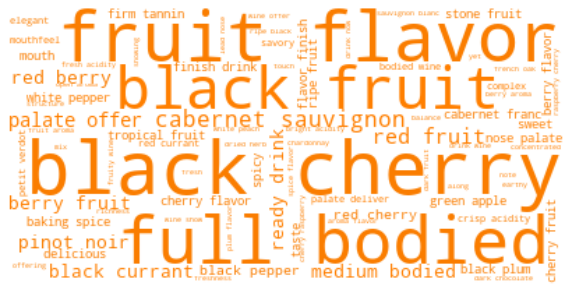

In [ ]:
cloud.recolor(color_func = grey_color_func)
plt.figure(figsize = (10,10))
plt.imshow(cloud, interpolation ="bilinear")
plt.axis("off")
plt.show()

###Exploration préliminaire des datasets

In [ ]:
df_vin_us.shape

(129957, 13)

Nous avons 129 957 vins différents, ainsi que 13 colonnes

In [ ]:
df_vin_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129957 entries, 0 to 129956
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129894 non-null  object 
 1   description            129957 non-null  object 
 2   designation            92497 non-null   object 
 3   points                 129957 non-null  int64  
 4   price                  120964 non-null  float64
 5   province               129894 non-null  object 
 6   region_1               108710 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103713 non-null  object 
 9   taster_twitter_handle  98744 non-null   object 
 10  title                  129957 non-null  object 
 11  variety                129956 non-null  object 
 12  winery                 129957 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 12.9+ MB


Quelque valeurs nuls dans la base de données, Nous avons du texte pour la plus part des variables. La colonne "points" est en integers, ar la colonne "price" est en float

Notez que 63 vins n'ont pas de pays renseignés ,ni de province. 8 993 vins n'ont pas de prix renseignés. Plus de 20 000 vins n'ont pas de région référencer, ni de testeur. 1 seul des vins de cette base n'a pas de variété renseigné.

###Gestions des valeurs manquantes

In [ ]:
df_vin_us.isna().sum()

country                     63
description                  0
designation              37460
points                       0
price                     8993
province                    63
region_1                 21247
region_2                 79446
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

####country

In [ ]:
df_country_na = df_vin_us.loc[df_vin_us["country"].isna()==True]

In [ ]:
df_country_na

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,NaN,"Amber in color, this wine has aromas of peach jam and orange blossom. Flavors are a mélange of mellow fruit and savory notes, in particular apricot, lemon curd, quince and bitter almond. Despite strong tannins, there are moments of brightness across the entire palate that linger into the finish.",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2018 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
3131,NaN,"Soft, fruity and juicy, this is a pleasant, simple wine that is a blend from different European countries. It is balanced and very drinkable for parties or barbecues. Screwcap.",Partager,83,NaN,NaN,NaN,NaN,Roger Voss,@vossroger,Barton & Guestier NV Partager Red,Red Blend,Barton & Guestier
4243,NaN,"Violet-red in color, this semisweet wine has a nose of blackberry and vanilla. It is soft on entry, with flavors of black cherry, blueberry and creme brûlée. It is smooth on the palate, while the blueberry pie finish is brightened up by a brief but not unwelcome tart note.",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2016 Red Naturally Semi-Sweet Ojaleshi,Ojaleshi,Kakhetia Traditional Winemaking
9509,NaN,"This mouthwatering blend starts with a nose of fresh mint, pineapple and mango, followed by flavors of orange peel, peach and lemon. Fresh and fruity with a mineral backbone, the wine finishes on an earthy spin. Pair with grilled sardines or poultry dishes.",Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2019 Theopetra Malagouzia-Assyrtiko White,White Blend,Tsililis
9750,NaN,"This orange-style wine has a cloudy yellow-gold appearance because it spent 30 days on the skins and 100 days on the lees. It has aromas and flavors of aged apple cider and tart apple pie with an astringent finish. This style is not for everyone, but for those who appreciate orange wine made fro...",Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2019 Orange Nikolaevo Vineyard Chardonnay,Chardonnay,Ross-idi
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124162,NaN,"This Swiss red blend is composed of four varieties and has aromas of black cherry, red pepper and bell pepper and aromas of black raspberry and elderberry. The tannins are velvety and well balanced.",Les Romaines,90,30.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Les Frères Dutruy 2018 Les Romaines Red,Red Blend,Les Frères Dutruy
129393,NaN,"Dry spicy aromas of dusty plum and tomato add up to a good whole. This Cab is crisp and alert on the palate, with popping acidity that creates some sharpness. Earthy and spicy currant and red-plum flavors finish direct and juicy.",Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2019 Reserve Cabernet Sauvignon,Cabernet Sauvignon,El Capricho
129394,NaN,"El Capricho is one of Uruguay's more consistent wineries in terms of putting out wines of character and quality. This Tempranillo is smoky, spicy and woodsy on the nose, with notes of cola accenting berry and currant scents. A pulling drawing palate is a bit tannic, while this tastes of toasty o...",Reserve,89,22.0,NaN,NaN,NaN,Michael Schachner,@wineschach,El Capricho 2019 Reserve Tempranillo,Tempranillo,El Capricho
129576,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon and 10% Merlot, this inky garnet-colored wine offers aromas of cassis and elderberry. On the palate, there is a combination of cooked fruit and cool spice flavors yet there is no lack of accompanying acidity. Flavors of cassis, elderberry, anise, oran...",Shah,90,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Büyülübağ 2016 Shah Red,Red Blend,Büyülübağ


Nous avons ici les 63 vins ou le country n'est pas rensigné. Essayons de savoir si nous pouvons récupérer les informations

In [ ]:
df_country_na["taster_name"].value_counts()

Jeff Jenssen         22
Mike DeSimone        12
Anne Krebiehl MW      9
Michael Schachner     7
Susan Kostrzewa       5
Lauren Buzzeo         3
Joe Czerwinski        2
Roger Voss            2
Paul Gregutt          1
Name: taster_name, dtype: int64

Nous pouvons observer que 22 des vins ont été tester par Jeff Jenssen. Regardons quel vin teste il habituellemnt. 

In [ ]:
df_vin_jenssen = df_vin_us.loc[df_vin_us["taster_name"]=="Jeff Jenssen"]

In [ ]:
df_vin_jenssen["country"].value_counts()

Bulgaria                  113
Hungary                    94
Romania                    66
Slovenia                   61
Moldova                    52
Croatia                    31
Serbia                     12
Ukraine                    12
Czech Republic              8
Macedonia                   6
Switzerland                 6
Luxembourg                  6
Bosnia and Herzegovina      1
Greece                      1
Name: country, dtype: int64

Nous pouvons observer que beaucoup des vin qu'il a testé viennent des pays de l'est mais aucune donnée nous aident a déduire quelle est le pays des régions manquante

In [ ]:
df_country_na["winery"].value_counts()

Neumeister                         9
Orbelus                            7
Gotsa Family Wines                 4
Stone Castle                       4
Ross-idi                           4
Psagot                             4
Tsililis                           3
St. Donat                          3
El Capricho                        3
Les Frères Dutruy                  2
Barton & Guestier                  2
Ktima Voyatzi                      2
Mt. Beautiful                      2
Chilcas                            1
Bartho Eksteen                     1
Familia Deicas                     1
Somlói Vándor                      1
Newton Johnson                     1
Büyülübağ                          1
Kakhetia Traditional Winemaking    1
Amiran Vepkhvadze                  1
Teliani Valley                     1
Lismore                            1
Undurraga                          1
Santa Ema                          1
Logodaj                            1
Bachelder                          1
N

Regardons si la variable winery peut nous permettre de récupérer le pays d'origine du vin

In [ ]:
df_vin_us.loc[df_vin_us["winery"]=="Psagot"]["country"].value_counts()

Israel    15
Name: country, dtype: int64

In [ ]:
df_vin_us.loc[df_vin_us["winery"]=="Gotsa Family Wines"]["country"].value_counts()

Georgia    1
Name: country, dtype: int64

In [ ]:
df_vin_us.loc[df_vin_us["winery"]=="Barton & Guestier"]["country"].value_counts()

France    78
Name: country, dtype: int64

Effectivement nous retrouvon toujours une country pour chaque winery. Utilisons cette variables pour remplacer les valeurs manquantes. Pour cela créons un dictionnaire avec les valeurs qui nous interesse

In [ ]:
df_vin_us_dico=df_vin_us[["country","winery"]].dropna(axis=0)

In [ ]:
df_vin_us_dico.drop_duplicates(inplace=True)

In [ ]:
df_vin_us_dico

,country,winery
0,Italy,Nicosia
1,Portugal,Quinta dos Avidagos
2,US,Rainstorm
3,US,St. Julian
4,US,Sweet Cheeks
...,...,...
129739,South Africa,Flagstone
129747,France,Mas de Pampelonne
129842,Spain,Bodegas Eidosela
129876,Argentina,Penedo Borges


In [ ]:
dico_win_country={}
for winery, country in zip(df_vin_us_dico["winery"],df_vin_us_dico["country"]):
  dico_win_country[winery] = country

In [ ]:
dico_win_country

{'Nicosia': 'Italy',
 'Quinta dos Avidagos': 'Portugal',
 'Rainstorm': 'US',
 'St. Julian': 'US',
 'Sweet Cheeks': 'US',
 'Tandem': 'US',
 'Terre di Giurfo': 'Italy',
 'Trimbach': 'France',
 'Heinz Eifel': 'Germany',
 'Jean-Baptiste Adam': 'France',
 'Kirkland Signature': 'Chile',
 'Leon Beyer': 'France',
 'Louis M. Martini': 'US',
 'Masseria Setteporte': 'Italy',
 'Mirassou': 'US',
 'Richard Böcking': 'Germany',
 'Felix Lavaque': 'Argentina',
 'Gaucho Andino': 'Argentina',
 'Pradorey': 'Spain',
 'Quiévremont': 'US',
 'Acrobat': 'US',
 'Baglio di Pianetto': 'Italy',
 'Bianchi': 'US',
 'Canicattì': 'Italy',
 'Castello di Amorosa': 'US',
 'Stemmari': 'Italy',
 'Clarksburg Wine Company': 'US',
 'Domaine de la Madone': 'France',
 'Duca di Salaparuta': 'Italy',
 'Envolve': 'US',
 'Erath': 'US',
 'Estampa': 'Chile',
 'Feudi del Pisciotto': 'Italy',
 'Feudi di San Marzano': 'Italy',
 'Feudo di Santa Tresa': 'Italy',
 'Feudo Montoni': 'Italy',
 'Hawkins Cellars': 'US',
 'Henry Fessy': 'France'

In [ ]:
dico_win_country["Gotsa Family Wines"]

'Georgia'

In [ ]:
df_vin_us["country"] = df_vin_us["country"].fillna(df_vin_us["winery"].map(dico_win_country))

In [ ]:
df_vin_us["country"].isna().sum()

31

Nous récupérons 32 country sur les 63 manquants

In [ ]:
df_vin_us.loc[df_vin_us["country"].isna()==True]["winery"].unique()

array(['Kakhetia Traditional Winemaking', 'Tsililis', 'Ross-idi',
       'Orbelus', 'St. Donat', 'Stone Castle', 'Lismore', 'Somlói Vándor',
       'Les Frères Dutruy', 'El Capricho', 'Amiran Vepkhvadze',
       'Büyülübağ'], dtype=object)

Pour le reste des valeurs manquantes, recherchns sur internet si nous pouvons récuperer leurs provenances

In [ ]:
dico_win_country['Kakhetia Traditional Winemaking']='Georgia'
dico_win_country['Tsililis']='Greece'
dico_win_country['Ross-idi'] = 'Bulgaria'
dico_win_country['Orbelus']= 'Bulgaria'
dico_win_country['St. Donat'] = 'Hungary'
dico_win_country['Stone Castle'] = 'Kosova'
dico_win_country['Lismore'] = 'South Africa'
dico_win_country['Somlói Vándor'] = 'Hungary'
dico_win_country['Les Frères Dutruy'] = 'Switzerland'
dico_win_country['El Capricho'] = 'Uruguay'
dico_win_country['Amiran Vepkhvadze'] ='Georgia'
dico_win_country['Büyülübağ'] = 'Turkey'

In [ ]:
df_vin_us["country"] = df_vin_us["country"].fillna(df_vin_us["winery"].map(dico_win_country))

In [ ]:
df_vin_us["country"].isna().sum()

0

Tout les pays ont été remplis, passons a la suite.

####variety

In [ ]:
df_var_na = df_vin_us.loc[df_vin_us["variety"].isna()==True]

In [ ]:
df_var_na

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
86900,Chile,"A chalky, dusty mouthfeel nicely balances this Petite Syrah's bright, full blackberry and blueberry fruit. Wheat-flour and black-pepper notes add interest to the bouquet; the wine finishes with herb and an acorny nuttiness. A good first Chilean wine for those more comfortable with the California...",NaN,88,17.0,Maipo Valley,NaN,NaN,NaN,NaN,Carmen 2003 (Maipo Valley),NaN,Carmen


In [ ]:
df_vin_us["variety"].value_counts()

Pinot Noir                      13259
Chardonnay                      11752
Cabernet Sauvignon               9472
Red Blend                        8946
Bordeaux-style Red Blend         6915
                                ...  
Tamianka                            1
Thrapsathiri                        1
Ondenc                              1
Pinot Grigio-Sauvignon Blanc        1
Grenache Gris                       1
Name: variety, Length: 707, dtype: int64

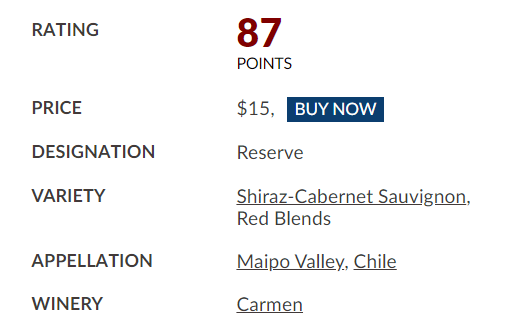

la variety manquantes est donc Cabernet Sauvignon ou Red Blend. Nous décidons de l'inscrire dans la variety Red Blend



In [ ]:
df_vin_us["variety"].fillna("Red Blend", inplace=True)

####price

In [ ]:
df_price_na = df_vin_us.loc[df_vin_us["price"].isna()==True]

In [ ]:
df_price_na['country'].value_counts()

France          4316
Italy           2626
Portugal         816
Austria          546
US               239
South Africa     110
Spain             72
Chile             56
Germany           45
Argentina         44
New Zealand       41
Australia         35
Israel            16
Slovenia           7
Greece             5
Brazil             5
England            5
Canada             3
Georgia            2
Croatia            2
Egypt              1
Hungary            1
Name: country, dtype: int64

Beaucoup de vins sans prix sont Francais.

In [ ]:
df_price_na

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2017 Vulkà Bianco (Etna),White Blend,Nicosia
13,Italy,"This is dominated by oak and oak-driven aromas that include roasted coffee bean, espresso, coconut and vanilla that carry over to the palate, together with plum and chocolate. Astringent, drying tannins give it a rather abrupt finish.",Rosso,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Masseria Setteporte 2016 Rosso (Etna),Nerello Mascalese,Masseria Setteporte
30,France,"Red cherry fruit comes laced with light tannins, giving this bright wine an open, juicy character.",Nouveau,86,NaN,Beaujolais,Beaujolais-Villages,NaN,Roger Voss,@vossroger,Domaine de la Madone 2016 Nouveau (Beaujolais-Villages),Gamay,Domaine de la Madone
31,Italy,"Merlot and Nero d'Avola form the base for this easy red wine that would pair with fettuccine and meat sauce or pork roast. The quality of the fruit is clean, bright and sharp.",Calanìca Nero d'Avola-Merlot,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2014 Calanìca Nero d'Avola-Merlot Red (Sicilia),Red Blend,Duca di Salaparuta
32,Italy,"Part of the extended Calanìca series, this Grillo-Viognier blend shows aromas of honeysuckle and jasmine, backed by touches of cut grass and wild sage. In the mouth, it shows ripe yellow-fruit flavors.",Calanìca Grillo-Viognier,86,NaN,Sicily & Sardinia,Sicilia,NaN,NaN,NaN,Duca di Salaparuta 2015 Calanìca Grillo-Viognier White (Sicilia),White Blend,Duca di Salaparuta
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129830,Italy,"Doga delle Clavule is a neutral, mineral-driven Morellino with background aromas of forest berry and cola. It has an easy, no-fuss approach and would pair perfectly with informal home-cooked meals.",Doga delle Clavule,86,NaN,Tuscany,Morellino di Scansano,NaN,NaN,NaN,Caparzo 2010 Doga delle Clavule (Morellino di Scansano),Sangiovese,Caparzo
129846,Portugal,This rich wine has a firm structure as well as ripe fruit. Foot trodden in stone troughs. It has a generous Port-like texture that is balanced by the black currant acidity and delicious fruitiness. Drink from 2021.,Pacheca Superior,90,NaN,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta da Pacheca 2017 Pacheca Superior Red (Douro),Portuguese Red,Quinta da Pacheca
129849,Portugal,"This mature wine that has 50% Touriga Nacional in its blend, is firm and structured, with a smooth edge of wood aging that makes it very drinkable now. A black plum skin texture gives the wine extra concentration. Drink until 2025.",Reserva,90,NaN,Dão,NaN,NaN,Roger Voss,@vossroger,Seacampo 2015 Reserva Red (Dão),Portuguese Red,Seacampo
129879,Italy,"Aromas of passion fruit, hay and a vegetal note lead the nose while the bright fresh palate doles provides juicy nectarine, creamy peach and pear. A hint of mineral and white almond close the lingering finish.",Corte Menini,91,NaN,Veneto,Soave Classico,NaN,Kerin O’Keefe,@kerinokeefe,Le Mandolare 2019 Corte Menini (Soave Classico),Garganega,Le Mandolare


Nous gardons pour le moment tout les vin nous supprimon ces vin quand nous étudirons les prix sur le marché

In [ ]:
df_vin_us.drop(df_price_na.index , inplace=True)

In [ ]:
df_vin_us

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2017 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2015 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129953,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation
129954,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2021.",Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser
129955,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2019.",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


####province

In [ ]:
df_province_na = df_vin_us.loc[df_vin_us["province"].isna()==True]

In [ ]:
df_province_na

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
913,Georgia,"Amber in color, this wine has aromas of peach jam and orange blossom. Flavors are a mélange of mellow fruit and savory notes, in particular apricot, lemon curd, quince and bitter almond. Despite strong tannins, there are moments of brightness across the entire palate that linger into the finish.",Asureti Valley,87,30.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Gotsa Family Wines 2018 Asureti Valley Chinuri,Chinuri,Gotsa Family Wines
4243,Georgia,"Violet-red in color, this semisweet wine has a nose of blackberry and vanilla. It is soft on entry, with flavors of black cherry, blueberry and creme brûlée. It is smooth on the palate, while the blueberry pie finish is brightened up by a brief but not unwelcome tart note.",Red Naturally Semi-Sweet,88,18.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Kakhetia Traditional Winemaking 2016 Red Naturally Semi-Sweet Ojaleshi,Ojaleshi,Kakhetia Traditional Winemaking
9509,Greece,"This mouthwatering blend starts with a nose of fresh mint, pineapple and mango, followed by flavors of orange peel, peach and lemon. Fresh and fruity with a mineral backbone, the wine finishes on an earthy spin. Pair with grilled sardines or poultry dishes.",Theopetra Malagouzia-Assyrtiko,92,28.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2019 Theopetra Malagouzia-Assyrtiko White,White Blend,Tsililis
9750,Bulgaria,"This orange-style wine has a cloudy yellow-gold appearance because it spent 30 days on the skins and 100 days on the lees. It has aromas and flavors of aged apple cider and tart apple pie with an astringent finish. This style is not for everyone, but for those who appreciate orange wine made fro...",Orange Nikolaevo Vineyard,89,28.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Ross-idi 2019 Orange Nikolaevo Vineyard Chardonnay,Chardonnay,Ross-idi
11150,Bulgaria,"A blend of 85% Melnik, 10% Grenache Noir and 5% Petit Verdot, this wine has aromas of saddle leather, cassis and dark chocolate. In the mouth there are flavors of cherry, chocolate and dried blueberry. It has good balance with a soft tannic finish.",NaN,89,20.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Orbelus 2017 Melnik,Melnik,Orbelus
14030,Hungary,"This Furmint, grown in marl soils, has aromas of brioche, apple tart and caramelized pear and flavors of lemon-lime juice, green apple and lime blossom before a crisp clean finish.",Márga,88,25.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,St. Donat 2017 Márga White,White Blend,St. Donat
16000,Uruguay,"Jumpy, jammy aromas of foxy black fruits are slightly volatile. This has a narrow mouthfeel that's high in acidity. Blackened berry flavors are spicy and peppery, while this Tannat is toasty on a live-wire acidic finish.",Valle de los Manantiales Vineyard,86,40.0,NaN,NaN,NaN,Michael Schachner,@wineschach,Familia Deicas 2019 Valle de los Manantiales Vineyard Tannat,Tannat,Familia Deicas
18072,Greece,"Delicate white flowers and a spin of lemon peel on the nose start this refined white. The bright fruit on the palate is tropical and exotic, but the minerality gives it lift. Fuller-bodied but poised, the wine has aging potential and a food-friendly character.",Askitikos,90,17.0,NaN,NaN,NaN,Susan Kostrzewa,@suskostrzewa,Tsililis 2019 Askitikos Assyrtiko,Assyrtiko,Tsililis
26480,Kosova,"This wine has aromas of black berry, dried red raspberry and blueberry. In the mouth there are flavors of blueberry juice and black plum. The finish is slightly jammy yet persistent.",NaN,87,13.0,NaN,NaN,NaN,Jeff Jenssen,@worldwineguys,Stone Castle 2017 Shiraz,Shiraz,Stone Castle
26481,Georgia,"Aromas of green apple and white flowers prepare the palate for a wine that fills the mouth with soft fruit flavors, in particular apple, grapefruit and pineapple. The soft finish is marked by a note of Granny Smith apple.",NaN,87,14.0,NaN,NaN,NaN,Mike DeSimone,@worldwineguys,Teliani Valley 2019 Tsolikouri

In [ ]:
df_vin_us.loc[df_vin_us["winery"]=="Psagot"]["province"].value_counts()

Judean Hills       12
Jerusalem Hills     3
Name: province, dtype: int64

Pour les variable province, region1 et région2 nous ne pourrons pas remplacer les valeurs manquante. Laissons les pour le moment nous déciderons pas la suite si les variable sont réellement utile pour l'etude de marché

On ne pourra pas faire le meme traitement que pour les country

####Autres

In [ ]:
df_vin_us.fillna("Non Renseigne", inplace=True)

###Création de la variable millesime

In [ ]:
test_ = df_vin_us["title"].iloc[0]

In [ ]:
test_

'Quinta dos Avidagos 2015 Avidagos Red (Douro)'

In [ ]:
[int(s) for s in test_.split() if s.isdigit()]

[2015]

In [ ]:
def millesim(text) :
  list_digit=[]
  list_year=[]
  for txt in text.split():
    if txt.isdigit():
      list_digit.append(txt)

  for year in list_digit:
    if (len(str(year))==4) & (int(year)>1900) & (int(year)<2021):
      list_year.append(year)

  if list_year:

    return int(max(list_year))

  else :
    return 0000

In [ ]:
df_vin_us["millesime"] = df_vin_us["title"].apply(millesim)

In [ ]:
df_vin_us

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,15.0,Douro,Non Renseigne,Non Renseigne,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",Non Renseigne,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Non Renseigne,Alexander Peartree,Non Renseigne,St. Julian 2017 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2017
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2016
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,Non Renseigne,Michael Schachner,@wineschach,Tandem 2015 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Non Renseigne,Non Renseigne,Anna Lee C. Iijima,Non Renseigne,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017
129953,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",Non Renseigne,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008
129954,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2021.",Kritt,90,30.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser,2017
129955,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2019.",Non Renseigne,90,32.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016


In [ ]:
df_vin_avt2000= df_vin_us.loc[df_vin_us["millesime"]<2000]

Certain millesim ne sont pas bon, comme par exemple le l'extra dry italien qui dans sa marque indique 1607 alors que c'est une bouteille de 2008, aucun pinot noir dans cette liste nous pouvons donc supprimmer les vins inférieur a 1934 (les vins a partir de cette année dans cette liste ont le bon millesime) 



In [ ]:
df_vin_us.drop(df_vin_avt2000.index , inplace=True)

Concentrons nous sur les millesim que nous n'avons pas pu récupérer !

In [ ]:
df_vin_9999 = df_vin_us.loc[df_vin_us["millesime"]==0000]

In [ ]:
df_vin_9999_pinot_noir = df_vin_9999.loc[df_vin_9999["variety"]=="Pinot Noir"]

In [ ]:
df_vin_9999.sort_values(["points" , "price"], ascending=False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime


In [ ]:
df_vin_9999_pinot_noir.sort_values(["points" , "price"], ascending=False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime


Nous allons mettre de côté les millesimes non renseigné. Il seront peut être utiles par la suite

In [ ]:
df_vin_us.drop(df_vin_9999.index , inplace=True)

In [ ]:
df_vin_us

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,15.0,Douro,Non Renseigne,Non Renseigne,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",Non Renseigne,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Non Renseigne,Alexander Peartree,Non Renseigne,St. Julian 2017 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2017
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2016
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,Non Renseigne,Michael Schachner,@wineschach,Tandem 2015 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Non Renseigne,Non Renseigne,Anna Lee C. Iijima,Non Renseigne,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017
129953,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",Non Renseigne,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008
129954,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2021.",Kritt,90,30.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser,2017
129955,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2019.",Non Renseigne,90,32.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016


In [ ]:
df_vin_us

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
1,Portugal,"This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's already drinkable, although it will certainly be better from 2020.",Avidagos,87,15.0,Douro,Non Renseigne,Non Renseigne,Roger Voss,@vossroger,Quinta dos Avidagos 2015 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2015
2,US,"Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.",Non Renseigne,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2017 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2017
3,US,"Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Non Renseigne,Alexander Peartree,Non Renseigne,St. Julian 2017 Reserve Late Harvest Riesling (Lake Michigan Shore),Riesling,St. Julian,2017
4,US,"Much like the regular bottling from 2016, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy country wine, it's a good companion to a hearty winter stew.",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2016 Vintner's Reserve Wild Child Block Pinot Noir (Willamette Valley),Pinot Noir,Sweet Cheeks,2016
5,Spain,"Blackberry and raspberry aromas show a typical Navarran whiff of green herbs and, in this case, horseradish. In the mouth, this is fairly full bodied, with tomatoey acidity. Spicy, herbal flavors complement dark plum fruit, while the finish is fresh but grabby.",Ars In Vitro,87,15.0,Northern Spain,Navarra,Non Renseigne,Michael Schachner,@wineschach,Tandem 2015 Ars In Vitro Tempranillo-Merlot (Navarra),Tempranillo-Merlot,Tandem,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129952,Germany,"Notes of honeysuckle and cantaloupe sweeten this deliciously feather-light spätlese. It's intensely juicy, quenching the palate with streams of tart tangerine and grapefruit acidity, yet wraps up with a kiss of honey and peach.",Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,Non Renseigne,Non Renseigne,Anna Lee C. Iijima,Non Renseigne,Dr. H. Thanisch (Erben Müller-Burggraef) 2017 Brauneberger Juffer-Sonnenuhr Spätlese Riesling (Mosel),Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),2017
129953,US,"Citation is given as much as a decade of bottle age prior to release, which means it is pre-cellared and drinking at its peak. Baked cherry, cocoa and coconut flavors combine gracefully, with soft, secondary fruit compote highlights.",Non Renseigne,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2008 Pinot Noir (Oregon),Pinot Noir,Citation,2008
129954,France,"Well-drained gravel soil gives this wine its crisp and dry character. It is ripe and fruity, although the spice is subdued in favor of a more serious structure. This is a wine to age for a couple of years, so drink from 2021.",Kritt,90,30.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Gresser 2017 Kritt Gewurztraminer (Alsace),Gewürztraminer,Domaine Gresser,2017
129955,France,"A dry style of Pinot Gris, this is crisp with some acidity. It also has weight and a solid, powerful core of spice and baked apple flavors. With its structure still developing, the wine needs to age. Drink from 2019.",Non Renseigne,90,32.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,Domaine Marcel Deiss 2016 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss,2016


In [ ]:
df_vin_us.loc[df_vin_us["variety"]=="Pinot Noir"].sort_values("points" , ascending = False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
1557,US,"A stupendous Pinot Noir, showing how beautifully this vineyard performs in the remote Sonoma Coast above Fort Ross. Williams Selyem's last few vintages of Precious Mountain have been extraordinary, but this 2013 tops them all. The wine is as light as a feather in the mouth, modest in alcohol and...",Precious Mountain Vineyard,99,94.0,California,Sonoma Coast,Sonoma,Non Renseigne,Non Renseigne,Williams Selyem 2013 Precious Mountain Vineyard Pinot Noir (Sonoma Coast),Pinot Noir,Williams Selyem,2013
47422,US,"This expresses the greatness of its vintage and vineyard, offering wave after wave of raspberry and cherry pie flavors, plus notes of red currant, sweet licorice, spicy Dr. Pepper and smoky sandalwood. There's also something exotically briary and wild that intrigues. Even more remarkable is the ...",Hirsch Vineyard,99,75.0,California,Sonoma Coast,Sonoma,Non Renseigne,Non Renseigne,Williams Selyem 2014 Hirsch Vineyard Pinot Noir (Sonoma Coast),Pinot Noir,Williams Selyem,2014
127354,US,"This is a best barrel blend of Goldeneye's several vineyards. It takes its beautifully ripe fruit from Confluence and the tannins of The Narrows to yield a dry, densely constructed and moderately ageable wine of exceptionally high quality and appeal. Blackberries, blueberries, cherries and exoti...",Ten Degrees,98,100.0,California,Anderson Valley,Non Renseigne,Non Renseigne,Non Renseigne,Goldeneye 2011 Ten Degrees Pinot Noir (Anderson Valley),Pinot Noir,Goldeneye,2011
48890,France,"A beautiful wine, smooth, polished, with rounded corners. Its intense fruit is balanced and harmonizes well with the sweet tannins, the layers of wood and the red berry flavors. Certainly powerful, it impresses equally with the pleasure it will give in 7–10 years.",Non Renseigne,98,319.0,Burgundy,Clos de Tart,Non Renseigne,Roger Voss,@vossroger,Clos de Tart 2009 Clos de Tart,Pinot Noir,Clos de Tart,2009
109322,US,"Seductively smooth and intriguingly aromatic, this blend of several knock-out vineyards along Westside Road—Allen, Bacigalupi, Bucher, Rochioli Riverblock and Williams Selyem Estate—is instantly delicious, sharing a concentration of cherry, strawberry and citrus that perfectly captures the essen...",Westside Road Neighbors,98,69.0,California,Russian River Valley,Sonoma,Virginie Boone,@vboone,Williams Selyem 2017 Westside Road Neighbors Pinot Noir (Russian River Valley),Pinot Noir,Williams Selyem,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109390,US,"A soft, gluey Pinot Noir, with almost no structure and bizarre cherry candy and medicinal flavors.",Estate Grown,80,18.0,California,Cienega Valley,Central Coast,Non Renseigne,Non Renseigne,Pietra Santa 2013 Estate Grown Pinot Noir (Cienega Valley),Pinot Noir,Pietra Santa,2013
123529,France,"Earthy and rustic, this Pinot Noir is lightweight, with a hint of red cherry. There is an unpleasant bitter aftertaste.",Non Renseigne,80,20.0,Alsace,Alsace,Non Renseigne,Roger Voss,@vossroger,La Cave des Vignerons de Pfaffenheim 2013 Pinot Noir (Alsace),Pinot Noir,La Cave des Vignerons de Pfaffenheim,2013
19121,New Zealand,"A tartly acidic wine, with some sweet molasses aromas but also hints of decaying vegetation.",Non Renseigne,80,16.0,Canterbury,Non Renseigne,Non Renseigne,Joe Czerwinski,@JoeCz,Willow Creek 2004 Pinot Noir (Canterbury),Pinot Noir,Willow Creek,2004
93681,US,"Barely drinkable, although you'll get by at big parties where nobody cares. It's silky, sweet and minty.",Non Renseigne,80,7.0,California,California,California Other,Non Renseigne,Non Renseigne,Backhouse 2014 Pinot Noir (California),Pinot Noir,Backhouse,2014


In [ ]:
df_vin_us.loc[df_vin_us["millesime"]==2012].sort_values("points" , ascending = False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
123531,US,"Initially a rather subdued Frog; as if it has been tamed down. Then, suddenly, There's a plush core of blackberry fruit, and the classic Cayuse funkiness is there, drenched in liquid rocks and cured meat and drying tannins. It's all in proportion and a fine reflection of the steely vintage. As i...",Bionic Frog,100,80.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,@paulgwine,Cayuse 2012 Bionic Frog Syrah (Walla Walla Valley (WA)),Syrah,Cayuse,2012
89719,France,"This latest incarnation of the famous brand is a superb wine. It is on par with, maybe even better than, the already legendary 2006. Its balance is impeccable: Apple and citrus flavors working with the tight minerality to give a textured yet fruity wine. Produced from Roederer's own vineyards wh...",Cristal Vintage Brut,100,250.0,Champagne,Champagne,Non Renseigne,Roger Voss,@vossroger,Louis Roederer 2012 Cristal Vintage Brut (Champagne),Champagne Blend,Louis Roederer,2012
42192,Portugal,This is the latest release of what has long been regarded as Portugal's iconic wine. And it is magnificent. The last vintage was the 2008 and the wait has now shown to be worthwhile. With its immense span and breadth of flavors and rich structure it is a superb manifestation of the great vineyar...,Barca-Velha,100,450.0,Douro,Non Renseigne,Non Renseigne,Roger Voss,@vossroger,Casa Ferreirinha 2012 Barca-Velha Red (Douro),Portuguese Red,Casa Ferreirinha,2012
107891,US,"An absolute joy and triumph. Just superb, showcasing the best of Oakville. Perfect tannins, as pure as velvet and sweet, and perfect oak, too, with beautifully applied char and wood spice. That the oak is 100% new is in keeping with the wine's volumetrics. The wine's flavors are a profound, head...",Family Reserve,99,125.0,California,Oakville,Napa,Non Renseigne,Non Renseigne,Venge 2012 Family Reserve Cabernet Sauvignon (Oakville),Cabernet Sauvignon,Venge,2012
121872,US,"This is an absolutely beautiful wine to drink now, but the richness comes at the price of considerable alcohol. The color is dark and impenetrable, the aromas huge in Cabernet-inspired blackberries and black currants, with a touch of something herbal and also a stony minerality. There's also a f...",IX Estate,99,290.0,California,Napa Valley,Napa,Non Renseigne,Non Renseigne,Colgin 2012 IX Estate Red (Napa Valley),Red Blend,Colgin,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60868,Chile,Heavy and soupy in its current state. This is one chunked-out white wine that is barely hanging on with flavors of papaya and dried-out peach. Has lost whatever freshness it may have had.,La Joya Reserve,80,12.0,Colchagua Valley,Non Renseigne,Non Renseigne,Michael Schachner,@wineschach,Viña Bisquertt 2012 La Joya Reserve Viognier (Colchagua Valley),Viognier,Viña Bisquertt,2012
82740,Spain,"Flat and gaseous smelling, with sulfur and no fruit to speak of. Tastes like bland nectarine and tangerine, and the body and finish are almost flabby. Borderline in terms of its acceptability.",Pindal,80,9.0,Northern Spain,Rueda,Non Renseigne,Michael Schachner,@wineschach,TorresManur 2012 Pindal Verdejo-Viura (Rueda),Verdejo-Viura,TorresManur,2012
109518,Spain,"This is not fresh or fruity; in fact, the nose is nutty and muddied, with a rough, angular mouthfeel and flavors of peanut, vanilla and leathery raspberry.",V,80,40.0,Northern Spain,Vino de Calidad de Valtiendas,Non Renseigne,Michael Schachner,@wineschach,Vivencias 2012 V Tempranillo (Vino de Calidad de Valtiendas),Tempranillo,Vivencias,2012
109520,Spain,"This wine is not impressive in any way. It's tannic, abrasive and tastes stalky and weedy. The finish is rough and green, like rocks in the mouth.",Non Renseigne,80,30.0,Northern Spain,Ribera del Duero,Non Renseigne,Michael Schachner,@wineschach,Convento San Francisco 2012 Ribera del Duero,Red Blend,C

In [ ]:
df_vin_us["variety"].nunique()

684

In [ ]:
df_vin_us.sort_values("price" , ascending = False)

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery,millesime
80283,France,"This ripe wine shows plenty of blackberry fruits balanced well with some dry tannins. It is fresh, juicy with plenty of acidity, For a light vintage, it's perfumed, full of fresh flavors and will be ready to drink from 2021.",Non Renseigne,88,3300.0,Bordeaux,Médoc,Non Renseigne,Roger Voss,@vossroger,Château les Ormes Sorbet 2017 Médoc,Bordeaux-style Red Blend,Château les Ormes Sorbet,2017
98371,France,"A superb wine from a great year, this is powerful and structured, with great acidity and solid, pronounced fruits. La Romanée is a small vineyard, wholly owned by Liger-Belair, next to Romanée-Conti. The wine is rich, spicy and very complex, with black fruits welling up from its depth. With grea...",Non Renseigne,96,2500.0,Burgundy,La Romanée,Non Renseigne,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2014 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,2014
15840,France,"The wine is a velvet glove in an iron fist. The smooth surface of ripe fruits and rich blackberry flavors, masks the dense tannins that will allow this very great wine to age for many, many years. The acidity and the rich fruit combine with the fine dusty tannins. The wine will surely not be rea...",Non Renseigne,96,2500.0,Bordeaux,Pomerol,Non Renseigne,Roger Voss,@vossroger,Château Pétrus 2018 Pomerol,Bordeaux-style Red Blend,Château Pétrus,2018
120380,US,"The nose on this single-vineyard wine from a strong, often overlooked appellation is tight and minerally before showing a slightly tropical kiwi element. Brightly acidic on the lively palate, flavors range from Key lime and Meyer lemon to pear skins and apple flesh.",Roger Rose Vineyard,91,2013.0,California,Arroyo Seco,Central Coast,Matt Kettmann,@mattkettmann,Blair 2017 Roger Rose Vineyard Chardonnay (Arroyo Seco),Chardonnay,Blair,2017
113554,France,"A wonderfully complete wine, with all the elements in place. It is ripe and powerful, the black fruits jammy and rich. But at the same time, the layer of acidity, the dark tannins and the succulent texture all come together in a finely balanced way. It is almost exotic, but the tannins promise g...",Non Renseigne,96,2000.0,Burgundy,La Romanée,Non Renseigne,Roger Voss,@vossroger,Domaine du Comte Liger-Belair 2009 La Romanée,Pinot Noir,Domaine du Comte Liger-Belair,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20480,US,"Fruity, soft and rather sweet, this wine smells and tastes like apple and pear juice. It has low acidity, medium body and a sugary finish.",Non Renseigne,85,4.0,California,Clarksburg,Central Valley,Jim Gordon,@gordone_cellars,Dancing Coyote 2019 White (Clarksburg),White Blend,Dancing Coyote,2019
112909,Spain,"Nice on the nose, this has a leafy note and a mellow red-berry aroma. Bouncy and rubbery feeling, it has easygoing flavors of raspberry and plum. It's candied and rubbery tasting on the finish, but good overall.",Estate Bottled,84,4.0,Levante,Yecla,Non Renseigne,Michael Schachner,@wineschach,Terrenal 2014 Estate Bottled Tempranillo (Yecla),Tempranillo,Terrenal,2014
29548,Argentina,"Crimson in color but also translucent, with a candied, slightly green nose. Overall this is a simple quaffer with no excess weight and reasonably good flavors of berry and plum. Bland on the finish, but for $4 who's caring about finish?",Red,84,4.0,Mendoza Province,Mendoza,Non Renseigne,Michael Schachner,@wineschach,Broke Ass 2013 Red Malbec-Syrah (Mendoza),Malbec-Syrah,Broke Ass,2013
1987,Spain,"Berry and cherry aromas are surprisingly sturdy and clean. Freshness is maintained on the palate, which is honest enough to offer modest tannic bite. Lightly spiced plum and raspberry flavors change little on an easy finish.",Flirty Bird,85,4.0,Central Spain,Vino de la Tierra de Castilla,Non Renseigne,Michael Schachner,@wineschach,Felix Solis 2017 Flirty Bird Syrah (Vino de la Tierra de Castilla

###Exportation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [ ]:
df_vin_us.to_csv('df_vin_us.csv')
!cp df_vin_us.csv "drive/My Drive/"

# Trame Machine Learning



## Machine Learning (partie 1 : numérique)
Choisis la métrique la plus adaptée, puis entraine différents modèles/paramètres afin de prédire le prix d'une bouteille en fonction de la note ("points") et de l'année. Evalue les scores et conserve uniquement les meilleurs paramètres. Applique le modèle aux 14 vins du Domaine des Croix pour proposer un prix à chaque bouteille.
Pense à séparer le jeu de données et le jeu d'entrainement. Tu peux aussi utiliser CrossValidation et GridSearch.
Pense aussi à standardiser les données pour de meilleurs résultats.

## Machine Learning (partie 2 : catégories) : 
En plus de la note et de l'année, intégre les 10 cépages (variety) les plus représentés et les 10 pays (country) les plus représentés. Tu peux aussi ajouter la province si tu trouves cela plus précis.
Il faut transformer ces données pour être acceptées par le modèle. Les prédictions sont-elles très différentes de l'étape précédente ? Peux-tu proposer une interprétation ? Est-ce cohérent avec ton analyse descriptive ?

## Facultatif : Machine Learning (partie 3 : NLP) : 
Idem, mais en ajoutant les descriptions et toutes les autres informations à ta disposition.

# Trame Business Intelligence



## Analyse comparative

L'objectif ici sera de comparer chacun des vins du client par rapport à ses concurrents sur le marché. Par exemple, comparer les tarifs pratiqués pour les vins français, puis de plus en plus précisément, les vins de Bourgogne puisque notre client est en Bourgogne, puis les Pinot Noir bourguignons de la même année.
N'hésite pas à être original dans la présentation et les dataviz utilisées. Utilise toutes les fonctionnalités de Business Intelligence dans un tableau de bord pour aider au mieux le client à se comparer (infobulles, filtres, etc...).

## Proposition de valeur

Avec le tableau de bord que tu lui as fourni, le client a une idée précise de ses concurrents. Fais lui une proposition de prix en fonction de sa volonté de positionnement (par exemple : "si vous souhaitez vous positionner sur le haut de gamme, les 25% les plus chers de vos concurrents sont à ce tarif, nous vous conseillons donc de vous aligner sur ce prix").

## Qualité esthétique du tableau de bord

Essaye de garder un oeil critique et visuel sur ton tableau de bord. La forme compte autant que le fond pour le client qui n'est pas data analyst. Pense donc à "vendre" ton analyse. Par exemple, avec des couleurs s'inspirant du milieu vinicole, des dataviz originales, etc...

In [ ]:
df_vin

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,France,"Firm and solid with great swathes of black fruits as well as dense tannins. Ripe fruits are a major element of this concentrated wine. The wine has power and a firm tannic core, and certainly needs aging for seven years.",NaN,94,NaN,Burgundy,Corton Grèves,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Corton Grèves,Pinot Noir,Domaine des Croix
1,France,"A rich wine with great fruits as well as structure. It has the weight and great concentration of a grand cru selection. Plum fruits and acidity offer the potential for long aging. It's powerful, while also showing elegance. Age for 6–8 years.",La Vigne au Saint,94,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 La Vigne au Saint (Corton),Pinot Noir,Domaine des Croix
2,France,"A perfumed village wine, this is made from four different parcels. The wine offers an attractive touch of tannin and spice to go with the forward red fruits. It should develop relatively quickly, and will be ready to drink from 2022.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Beaune,Pinot Noir,Domaine des Croix
3,France,"A structured wine, packed with red fruits and delightful acidity. There is a core of dark tannin and a solid structure as well as the bright freshness at the end. Because it has this structure, it's worth aging for 4–5 years.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Beaune,Pinot Noir,Domaine des Croix
4,France,"This wine is perfumed with cherries and red berries. Its structure, which is certainly there, is almost secondary to this brilliant fruit. Balanced with a mineral dryness, the wine is certainly going to age into a ripe, pure-fruited wine. Drink from 2024.",Les Grèves Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2017 Les Grèves Premier Cru (Beaune),Pinot Noir,Domaine des Croix
5,France,"A structured wine, packed with red fruits and delightful acidity. There is a core of dark tannin and a solid structure as well as the bright freshness at the end. Because it has this structure, it's worth aging for 4–5 years.",NaN,90,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2015 Beaune,Pinot Noir,Domaine des Croix
6,France,"While this wine is firm, with some fine tannins, it also has a pure line in fresh strawberry fruits that will develop as the tannins soften. This perfumed wine will develop slowly. Drink from 2024.",Les Cent-Vignes Premier Cru,93,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 Les Cent-Vignes Premier Cru (Beaune),Pinot Noir,Domaine des Croix
7,France,"This wine has a smoky character that gives an exotic touch to the red fruits. It comes from 60-year old vines that give concentration and dark tannins. As it ages, the wine will broaden and expand to convey opulence and richness. Drink from 2022.",Grèves,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2016 Grèves (Corton),Pinot Noir,Domaine des Croix
8,France,"Dark fruit backs up the dense, dark and firm character of this wine. There is sweetness from the ripe fruits into which the tannins fall, leaving a trace of dryness at the end. A fine wine with a great future; drink from 2022.",La Vigne au Saint,95,NaN,Burgundy,Corton,NaN,Roger Voss,@vossroger,Domaine des Croix 2018 La Vigne au Saint (Corton),Pinot Noir,Domaine des Croix
9,France,"A fine, mineral, structured wine with a very dry, solid core. Juicy red fruits offer a hint for its future ripeness. It has the freshness of the vintage that shows through at the end of this chunky wine. Age for 5–7 years.",Bressandes Premier Cru,94,NaN,Burgundy,Beaune,NaN,Roger Voss,@vossroger,Domaine des Croix 2019 Bressandes Premier Cru (Beaune),Pinot Noir,Domaine des Croix


In [ ]:
df_vin.to_csv('df_vin.csv')
!cp df_vin.csv "drive/My Drive/"